In [76]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
def error(phi_a,phi_n):
    # compute error between analytical and numerical numbers

    return (phi_a-phi_n)/phi_a*100

In [77]:
def first_order_upwind(Nc,Pe, phiL, phiR, dx,L,M,S):

    # Left BCs
    M[0,0] = (12+3*Pe*dx)
    M[0,1] = - 4

    # The source term should calculate at cell center
    # At LHS, the first cell center is at x = dx/2
    S[0] = (8+3*Pe*dx)*phiL

    # Right BCs
    M[Nc-1,Nc-1] = 12
    M[Nc-1,Nc-2] = -(4+3*Pe*dx)

    # At RHS, the last cell center is at x = L - dx/2
    S[Nc-1] = (8-3*Pe*dx)*phiR

    # Construct Sparse Matrix
    # Interior
    print(f'Numerical solution:\n')
    for i in range(1,Nc-1):
        M[i,i] = (2+Pe*dx)
        M[i,i-1] = -(1+Pe*dx)
        M[i,i+1] = -1
        
        # Construct RHS matrix
        # If first cell, then x = x1 + 2 * (dx/2)
        # Otherwise, just add dx to jump to next cell
        if i ==1:
            x = dx/2
            x+=dx
        else:
            x += dx
        print(f'Current cell distance: {x}')
        S[i] = 0

    # Numerical method
    phi = np.matmul(np.linalg.inv(M),S)
    print(M,S)
    return phi

In [78]:
def second_order_upwind(Nc,Pe, phiL, phiR, dx,L,M,S):

    # Left BCs
    M[0,0] = 12+6*Pe*dx
    M[0,1] = - 4

    # The source term should calculate at cell center
    S[0] = (8+6*Pe*dx)*phiL
    
    # 2nd row
    M[1,1] = 4+3*Pe*dx
    M[1,2] = -2
    M[1,0] = -(2 + 5*Pe*dx)
    S[1] = -2*Pe*dx


    # Right BCs
    M[Nc-1,Nc-1] = 24
    M[Nc-1,Nc-2] = -(8+9*Pe*dx)
    M[Nc-1,Nc-3] = 3*Pe*dx

    # At RHS, the last cell center is at x = L - dx/2
    S[Nc-1] = (16-6*Pe*dx)*phiR

    # Construct Sparse Matrix
    # Interior
    print(f'Numerical solution:\n')
    for i in range(2,Nc-1):
        M[i,i] = (4+3*Pe*dx)
        M[i,i-1] = -(2+4*Pe*dx)
        M[i,i-2] = Pe*dx
        M[i,i+1] = -2
        
        # Construct RHS matrix
        # If first cell, then x = x1 + 2 * (dx/2)
        # Otherwise, just add dx to jump to next cell
        if i ==2:
            x = dx + dx/2
            x+=dx
        else:
            x += dx
        print(f'Current cell distance: {x}')
        S[i] = 0

    # Numerical method
    phi = np.matmul(np.linalg.inv(M),S)
    print(M,S)
    return phi

In [79]:
def QUICK(Nc,Pe, phiL, phiR, dx,L,M,S):

    # Left BCs
    M[0,0] = 12+3*Pe*dx
    M[0,1] = Pe*dx-4

    # The source term should calculate at cell center
    S[0] = (8+4*Pe*dx)*phiL
    
    # 2nd row
    M[1,1] = 48+10*Pe*dx
    M[1,2] = 9*Pe*dx-24
    M[1,0] = -(24 + 27*Pe*dx)
    S[1] = -8*Pe*dx


    # Right BCs
    M[Nc-1,Nc-1] = 96-9*Pe*dx
    M[Nc-1,Nc-2] = -(32+18*Pe*dx)
    M[Nc-1,Nc-3] = 3*Pe*dx

    # At RHS, the last cell center is at x = L - dx/2
    S[Nc-1] = (64-24*Pe*dx)*phiR

    # Construct Sparse Matrix
    # Interior
    print(f'Numerical solution:\n')
    for i in range(2,Nc-1):
        M[i,i] = (16+3*Pe*dx)
        M[i,i-1] = -(8+7*Pe*dx)
        M[i,i-2] = Pe*dx
        M[i,i+1] = 3*Pe*dx-8
        
        # Construct RHS matrix
        # If first cell, then x = x1 + 2 * (dx/2)
        # Otherwise, just add dx to jump to next cell
        if i ==2:
            x = dx + dx/2
            x+=dx
        else:
            x += dx
        print(f'Current cell distance: {x}')
        S[i] = 0

    # Numerical method
    phi = np.matmul(np.linalg.inv(M),S)
    print(M,S)
    return phi

# Comparison of 1st, 2nd order Upwind and QUICK algorithm

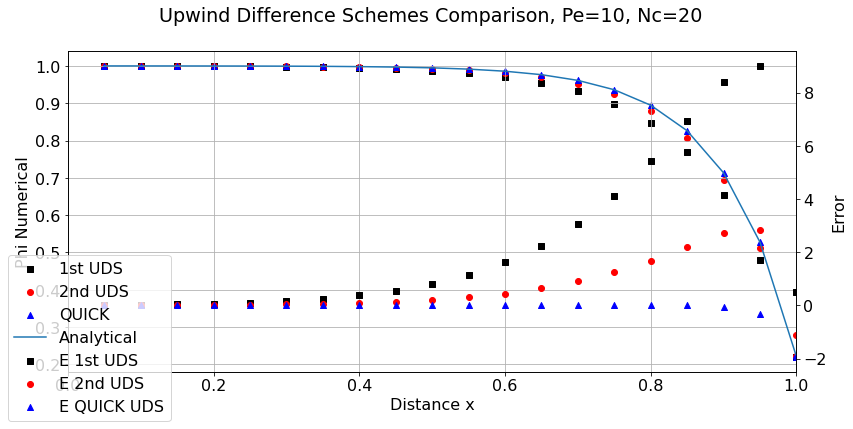

In [89]:

N=21    # Number of grid points
Nc = N-1 # Number of cells
L = 1   # length
M = np.zeros((Nc,Nc)) # an empty matrix for cells
S = np.zeros(Nc)
Pe = 10

dx = L/Nc    # Grid size
phiL = 1
phiR = 0

# Numerical method
phi1 = first_order_upwind(Nc,Pe, phiL, phiR, dx,L,M,S)
phi2 = second_order_upwind(Nc,Pe, phiL, phiR, dx,L,M,S)
phi3 = QUICK(Nc,Pe, phiL, phiR, dx,L,M,S)

# Analytical method 
print(f'\nAnalytical solution:')
phi_A = np.zeros((Nc))
for i in range(Nc):
    if i ==0:
        x = dx/2
    elif i == Nc-1:
        x = L-dx/2
    else:
        x += dx
    print(f'Current cell distance: {x}')
    phi_A[i] = (np.exp(Pe) - np.exp(Pe*x))/(np.exp(Pe) - 1)
clear_output(True)

# Error
e1 = error(phi_A,phi1)
e2 = error(phi_A,phi2)
e3 = error(phi_A,phi3)

# Cell distance
xs = np.arange(dx,L+dx,dx)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlim((0,1))
ax2 = ax1.twinx()
# ax2.set_ylim((-4e-3, 7e-3))
ax2.scatter(xs,e1,label='E 1st UDS',marker='s',c='black')
ax2.scatter(xs,e2,label='E 2nd UDS',marker='o',c='red')
ax2.scatter(xs,e3,label='E QUICK UDS',marker='^',c='blue')
ax2.set_ylabel('Error')


ax1.scatter(xs,phi1,label='1st UDS',marker='s',c='black')
ax1.scatter(xs,phi2,label='2nd UDS',marker='o',c='red')
ax1.scatter(xs,phi3,label='QUICK',marker='^',c='blue')
ax1.plot(xs,phi_A,label='Analytical')
ax1.set_ylabel('Phi Numerical')
ax1.set_xlabel('Distance x')

fig.legend(loc='lower left')
fig.suptitle(f'Upwind Difference Schemes Comparison, Pe={Pe}, Nc={Nc}')
ax1.grid()

fig.tight_layout()
plt.show()